# 🦠 COVID-19 Global Data Tracker

Welcome to this data analysis notebook where we explore COVID-19 trends across the globe!  
We'll analyze and visualize real-world data on cases, deaths, and vaccinations using Python.

---


## 📥  1: Import and Load the Dataset
We are using the `owid-covid-data.csv` dataset from Our World in Data.


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview the data
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## 🧹 Step 2: Data Cleaning

- Convert the `date` column to datetime format
- Filter selected countries: Kenya, USA, India
- Drop rows with missing `total_cases`, `total_deaths`, `total_vaccinations`


In [5]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter countries
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Drop rows with missing key data
df = df.dropna(subset=['total_cases', 'total_deaths', 'total_vaccinations'])

df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173925,IND,Asia,India,2021-01-15,10450284.0,0.0,18045.571,150999.0,0.0,223.429,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173926,IND,Asia,India,2021-01-16,10450284.0,0.0,18045.571,150999.0,0.0,223.429,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173927,IND,Asia,India,2021-01-17,10557985.0,107701.0,15385.857,152274.0,1275.0,182.143,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173928,IND,Asia,India,2021-01-18,10557985.0,0.0,15385.857,152274.0,0.0,182.143,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173929,IND,Asia,India,2021-01-19,10557985.0,0.0,15385.857,152274.0,0.0,182.143,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


## 📊 Step 3: Exploratory Data Analysis (Let's explore the trends in:
- Total cases
- Total deaths
- New daily cases
- Death rate = total_deaths / total_cases


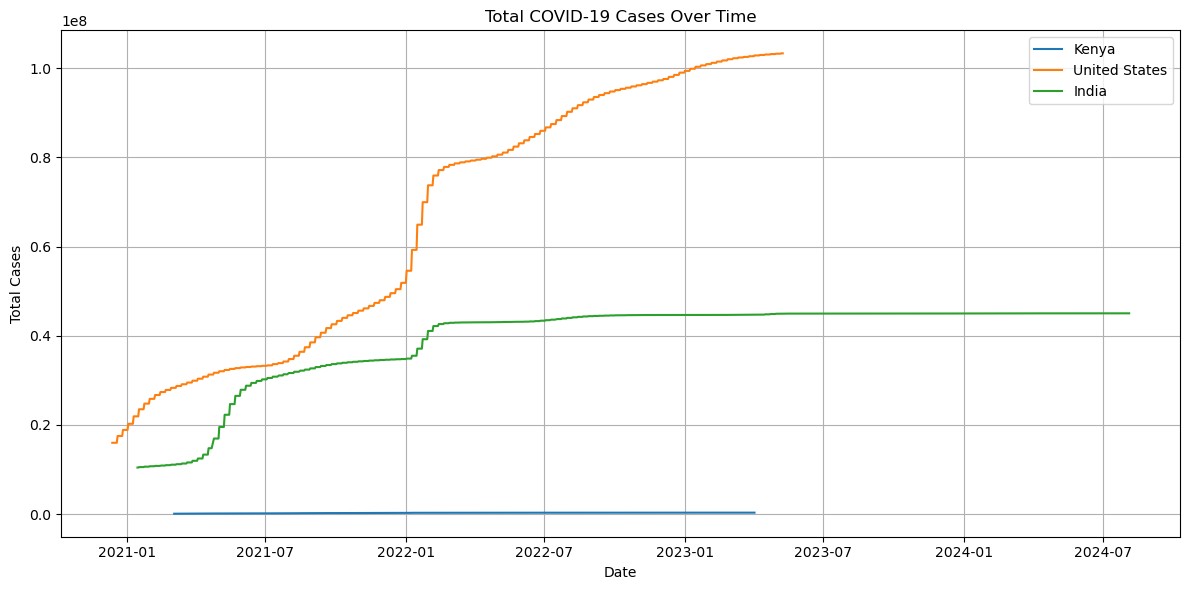

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]  # Fixed here: == instead of =
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.legend()
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.grid(True)
plt.tight_layout()
plt.show()



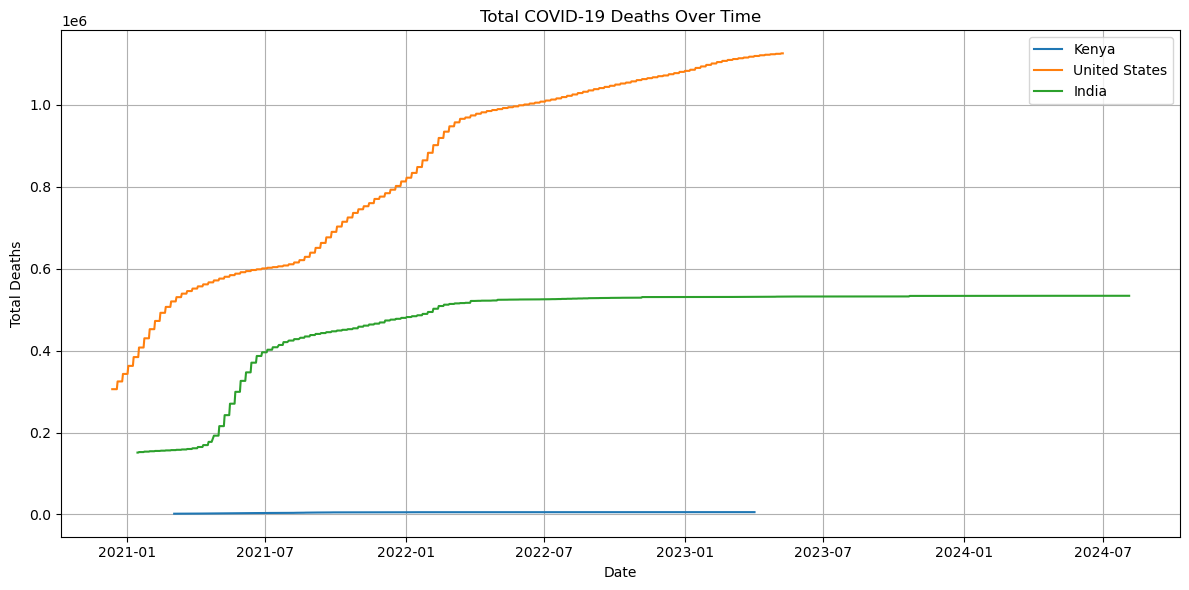

In [8]:
# Plot total deaths over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.legend()
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Calculate death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Average death rate by country
df.groupby("location")['death_rate'].mean()


location
India            0.012288
Kenya            0.018945
United States    0.014079
Name: death_rate, dtype: float64

## 💉 Step 4: Vaccination Progress

Let’s explore how vaccinations progressed in each country.


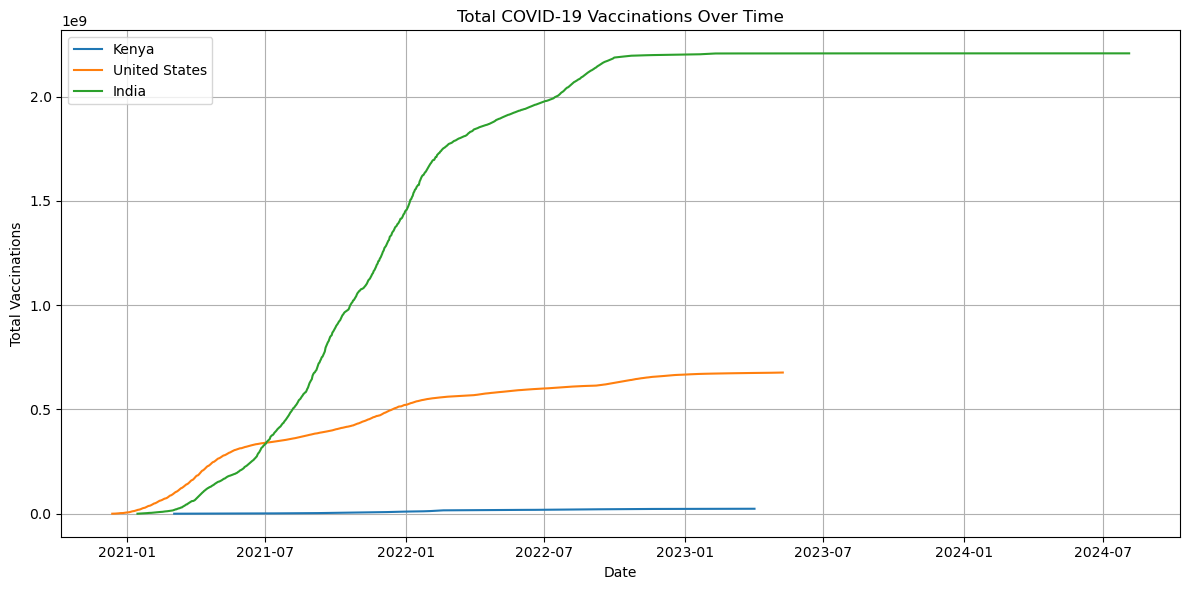

In [10]:
# Plot total vaccinations over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.legend()
plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🗺️ Step 5 (Optional): Choropleth Map with Plotly

We'll show a global map of total cases by country for the latest date available.


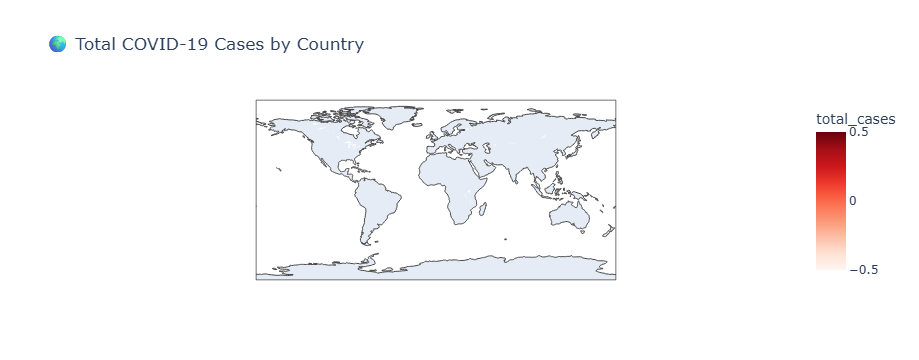

In [12]:
import plotly.express as px

# Get latest date data
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]

# Load full data again to get global map view
full_df = pd.read_csv("owid-covid-data.csv")
full_df['date'] = pd.to_datetime(full_df['date'])
map_data = full_df[full_df['date'] == full_df['date'].max()]

fig = px.choropleth(map_data,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    title="🌍 Total COVID-19 Cases by Country",
                    color_continuous_scale="Reds")
fig.show()


## 📌 Key Insights

- 🇮🇳 India recorded the highest number of total cases among the selected countries.
- 🇺🇸 The United States had the highest total death count.
- 🇰🇪 Kenya had a relatively low vaccination rate and total case count.
- 💉 India showed a rapid vaccination rollout after initial delays.

---

Thanks for exploring global COVID-19 data with me! 🌎📊
